# Import reqs

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Import data

In [18]:
teams_df = pd.read_csv('../data/Teams.csv')
print teams_df.shape
teams_df.head()

(364, 2)


,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [7]:
compact_df = pd.read_csv('../data/RegularSeasonCompactResults.csv')
print compact_df.shape
compact_df.head()

(145289, 8)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


# Define functions

In [107]:
def get_season(data_df, year):
    '''
    returns all games for a given season (year)
    '''
    df_year = data_df[data_df['Season']==2016]
    return df_year

def get_team_array(df_year, team_id):
    '''
    enter a dataframe for a particular year (df_year) and team (team_id)
    and return a new dataframe for a particular team (t_df)
    '''
    w_array = np.array(df_year['Wteam'] == team_id)
    l_array = np.array(df_year['Lteam'] == team_id)
    new_array = w_array + l_array
    t_df = df_year[new_array]
    return t_df

def last_n_games(t_df, n):
    '''
    takes a dataframe for a team's season and restricts
    to the last n games (t_n_df)
    '''
    t_n_df = t_df[-n:]
    return t_n_df

def calculate_win_percentage(t_n_df, team_id):
    '''
    Takes the last n games (t_n_df) of a team (team_id) and returns
    the winning percentage (win_percent)
    '''
    wins = len(t_n_df[t_n_df['Wteam']==team_id])
    losses = len(t_n_df[t_n_df['Lteam']==team_id])
    win_percent = float(wins) / (wins + losses)
    return win_percent


# Get season win percentages for all teams

In [133]:
# 2016 data only!
df_16 = get_season(compact_df, 2016)

win_percent_dict = {'Team_Id':[], 'Team_Name':[], 'Win_Percent':[]}

for i in range(teams_df.shape[0]):
    team_id = teams_df.iloc[i]['Team_Id']
    team_name = teams_df.iloc[i]['Team_Name']
    t_df = get_team_array(df_16, team_id)
    if t_df.shape[0] >= 20:
        t_n_df = last_n_games(t_df, 20)
        win_p = calculate_win_percentage(t_n_df, team_id)
        #print team_id, team_name, win_p
        win_percent_dict['Team_Id'].append(team_id)
        win_percent_dict['Team_Name'].append(team_name)
        win_percent_dict['Win_Percent'].append(win_p)

win_percent_df = pd.DataFrame(win_percent_dict)
win_percent_df.head()

,Team_Id,Team_Name,Win_Percent
0,1101,Abilene Chr,0.40
1,1102,Air Force,0.30
2,1103,Akron,0.70
3,1104,Alabama,0.45
4,1105,Alabama A&M,0.35


# Define more functions

In [151]:
# iterate through games for a team
t_df = get_team_array(df_16, 1323)
t_n_df = last_n_games(t_df, 20)
print t_n_df.shape
t_n_df.head()

(20, 8)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
142089,2016,61,1438,77,1323,66,H,0
142270,2016,66,1323,82,1130,54,A,0
142401,2016,68,1338,86,1323,82,A,0
142533,2016,72,1323,72,1210,64,H,0
142707,2016,75,1323,95,1181,91,A,0


In [156]:
def fetch_win_percent(win_percent_df, team_id):
    '''
    returns the winning percentage (win_p) for a given team (team_id) by
    querying the winning perecentage dataframe (win_percent_df)
    '''
    win_percent_series = win_percent_df[win_percent_df['Team_Id'] == team_id]['Win_Percent']
    win_p = list(win_percent_series)[0]
    return win_p

win_p = fetch_win_percent(win_percent_df, 1323)
print win_p

0.6


In [161]:
team_id = 1323

A = []
B = []

for index, row in t_n_df.iterrows():
    #print row
    wteam = row['Wteam']
    lteam = row['Lteam']
    if wteam == team_id:
        score_margin = row['Wscore'] - row['Lscore']
        other_team = lteam
    else:
        score_margin = row['Lscore'] - row['Wscore']
        other_team = wteam
    # fetchs winning percentages
    win_p1 = round(fetch_win_percent(win_percent_df, team_id),2)
    win_p2 = round(fetch_win_percent(win_percent_df, other_team),2)
    print (team_id,win_p1), (other_team,win_p2), score_margin, win_p1-win_p2
    A.append(score_margin)
    B.append(win_p1-win_p2)

(1323, 0.6) (1438, 0.7) -11 -0.1
(1323, 0.6) (1130, 0.05) 28 0.55
(1323, 0.6) (1338, 0.5) -4 0.1
(1323, 0.6) (1210, 0.45) 8 0.15
(1323, 0.6) (1181, 0.6) 4 0.0
(1323, 0.6) (1439, 0.55) 2 0.05
(1323, 0.6) (1130, 0.05) 27 0.55
(1323, 0.6) (1393, 0.5) -15 0.1
(1323, 0.6) (1448, 0.15) 23 0.45
(1323, 0.6) (1274, 0.7) -9 -0.1
(1323, 0.6) (1314, 0.8) 4 -0.2
(1323, 0.6) (1155, 0.5) 6 0.1
(1323, 0.6) (1257, 0.65) 5 -0.05
(1323, 0.6) (1210, 0.45) -1 0.15
(1323, 0.6) (1448, 0.15) 11 0.45
(1323, 0.6) (1199, 0.45) -21 0.15
(1323, 0.6) (1274, 0.7) -18 -0.1
(1323, 0.6) (1301, 0.3) 14 0.3
(1323, 0.6) (1181, 0.6) 5 0.0
(1323, 0.6) (1314, 0.8) -31 -0.2


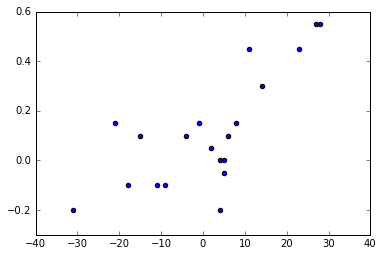

In [164]:
plt.scatter(A,B)